Install necessary components

In [1]:
# Libraries
! conda install pandas

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import random
import json
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!conda install -c conda-forge geocoder --yes
import geocoder

! pip install folium==0.5.0
import folium
from folium import plugins

from IPython.display import Image 
from IPython.core.display import HTML 

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_

Read from json and explore/clean up the data

In [10]:
df = pd.read_json ('https://data.fortworthtexas.gov/resource/ruhd-2sjc.json')

new_df = df.drop_duplicates(subset=['npa_name'], keep='first', inplace=False, ignore_index=False).reset_index(drop=True)

fort_worth_df = new_df.filter(['zipcode','npa_name','crimes_property','crimes_people','pct_near_grocery_store','pct_near_park','pct_near_library'], axis=1)

print (fort_worth_df.head())

   zipcode             npa_name  crimes_property  crimes_people  \
0    76247  Harriet Creek Ranch         0.000000       0.000000   
1    76008          Walsh Ranch         0.000000       0.000000   
2    76126   Benbrook Lake\ ETJ         0.000000       0.000000   
3    76052     Wise County\ ETJ         0.000000       0.000000   
4    76112            Woodhaven        88.566243      36.055656   

   pct_near_grocery_store  pct_near_park  pct_near_library  
0                0.000000       0.627845               0.0  
1                0.000000       0.000000               0.0  
2                0.000000       0.045983               0.0  
3                0.000000       0.000000               0.0  
4                0.702765       0.213091               1.0  


In [11]:
fort_worth_df.shape

(18, 7)

In [12]:
fort_worth_df

,zipcode,npa_name,crimes_property,crimes_people,pct_near_grocery_store,pct_near_park,pct_near_library
0,76247,Harriet Creek Ranch,0.000000,0.000000,0.000000,0.627845,0.000000
1,76008,Walsh Ranch,0.000000,0.000000,0.000000,0.000000,0.000000
2,76126,Benbrook Lake\ ETJ,0.000000,0.000000,0.000000,0.045983,0.000000
3,76052,Wise County\ ETJ,0.000000,0.000000,0.000000,0.000000,0.000000
4,76112,Woodhaven,88.566243,36.055656,0.702765,0.213091,1.000000
5,76140,Garden Acres,51.710791,16.256386,0.000000,0.612399,0.000000
6,76140,Far South,39.375929,23.031204,0.000000,0.000000,0.008722
7,76118,Gateway Park\ Riverbend,72.800229,18.056750,0.401707,0.814796,0.790222
8,76112,Handley,60.852350,21.360842,0.501734,0.724366,0.737047
9,76135,Far West,166.447368,33.552632,0.062938,0.063793,0.000000


In [15]:
fort_worth_df.rename(columns = {'npa_name': 'Neighborhood', 'crimes_property': 'Property Crimes', 'crimes_people': 'People Crimes', 'pct_near_grocery_store': 'Pct Near Grocery Store', 'pct_near_park': 'Pct Near Park', 'pct_near_library': 'Pct Near Library'}, inplace = True)
fort_worth_df

,zipcode,Neighborhood,Property Crimes,People Crimes,Pct Near Grocery Store,Pct Near Park,Pct Near Library
0,76247,Harriet Creek Ranch,0.000000,0.000000,0.000000,0.627845,0.000000
1,76008,Walsh Ranch,0.000000,0.000000,0.000000,0.000000,0.000000
2,76126,Benbrook Lake\ ETJ,0.000000,0.000000,0.000000,0.045983,0.000000
3,76052,Wise County\ ETJ,0.000000,0.000000,0.000000,0.000000,0.000000
4,76112,Woodhaven,88.566243,36.055656,0.702765,0.213091,1.000000
5,76140,Garden Acres,51.710791,16.256386,0.000000,0.612399,0.000000
6,76140,Far South,39.375929,23.031204,0.000000,0.000000,0.008722
7,76118,Gateway Park\ Riverbend,72.800229,18.056750,0.401707,0.814796,0.790222
8,76112,Handley,60.852350,21.360842,0.501734,0.724366,0.737047
9,76135,Far West,166.447368,33.552632,0.062938,0.063793,0.000000


Dataset does not inlclude latitude/longitude so using geocoder to find that information and add to dataframe

In [16]:
latitude=[]
longitude=[]
for code in fort_worth_df['zipcode']:
    g = geocoder.google('{}, Fort Worth, Texas'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Fort Worth, Texas'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

76247 None
76247 [33.03464863226613, -97.31863533882498]
76008 None
76008 [32.72196237180594, -97.56652433536073]
76126 None
76126 [32.67149000000006, -97.47109499999999]
76052 None
76052 [33.00845805271803, -97.4024495906433]
76112 None
76112 [32.73938000000004, -97.23229999999995]
76140 None
76140 [32.62745000000007, -97.29142999999999]
76140 None
76140 [32.62745000000007, -97.29142999999999]
76118 None
76118 [32.808655000000044, -97.23540999999994]
76112 None
76112 [32.73938000000004, -97.23229999999995]
76135 None
76135 [32.815495000000055, -97.43846499999995]
76107 None
76107 [32.754185000000064, -97.36123499999997]
76105 None
76105 [32.730740000000026, -97.28614999999996]
76177 None
76177 [32.90936160000007, -97.31443999999999]
76028 None
76028 [32.58670243129632, -97.30675805445837]
76137 None
76137 [32.87427500000007, -97.26956999999999]
76247 None
76247 [33.03464863226613, -97.31863533882498]
76262 None
76262 [33.007176155435175, -97.2677991515504]
76155 None
76155 [32.8247650

In [17]:
fort_worth_df['Latitude'] = latitude
fort_worth_df['Longitude'] = longitude

fort_worth_df

,zipcode,Neighborhood,Property Crimes,People Crimes,Pct Near Grocery Store,Pct Near Park,Pct Near Library,Latitude,Longitude
0,76247,Harriet Creek Ranch,0.000000,0.000000,0.000000,0.627845,0.000000,33.034649,-97.318635
1,76008,Walsh Ranch,0.000000,0.000000,0.000000,0.000000,0.000000,32.721962,-97.566524
2,76126,Benbrook Lake\ ETJ,0.000000,0.000000,0.000000,0.045983,0.000000,32.671490,-97.471095
3,76052,Wise County\ ETJ,0.000000,0.000000,0.000000,0.000000,0.000000,33.008458,-97.402450
4,76112,Woodhaven,88.566243,36.055656,0.702765,0.213091,1.000000,32.739380,-97.232300
5,76140,Garden Acres,51.710791,16.256386,0.000000,0.612399,0.000000,32.627450,-97.291430
6,76140,Far South,39.375929,23.031204,0.000000,0.000000,0.008722,32.627450,-97.291430
7,76118,Gateway Park\ Riverbend,72.800229,18.056750,0.401707,0.814796,0.790222,32.808655,-97.235410
8,76112,Handley,60.852350,21.360842,0.501734,0.724366,0.737047,32.739380,-97.232300
9,76135,Far West,166.447368,33.552632,0.062938,0.063793,0.000000,32.815495,-97.438465


Dataframe is ready to use so using bar graph to compare neighborhoods by property crime, people crime, and percent of population near grocery stores, parks, and libraries

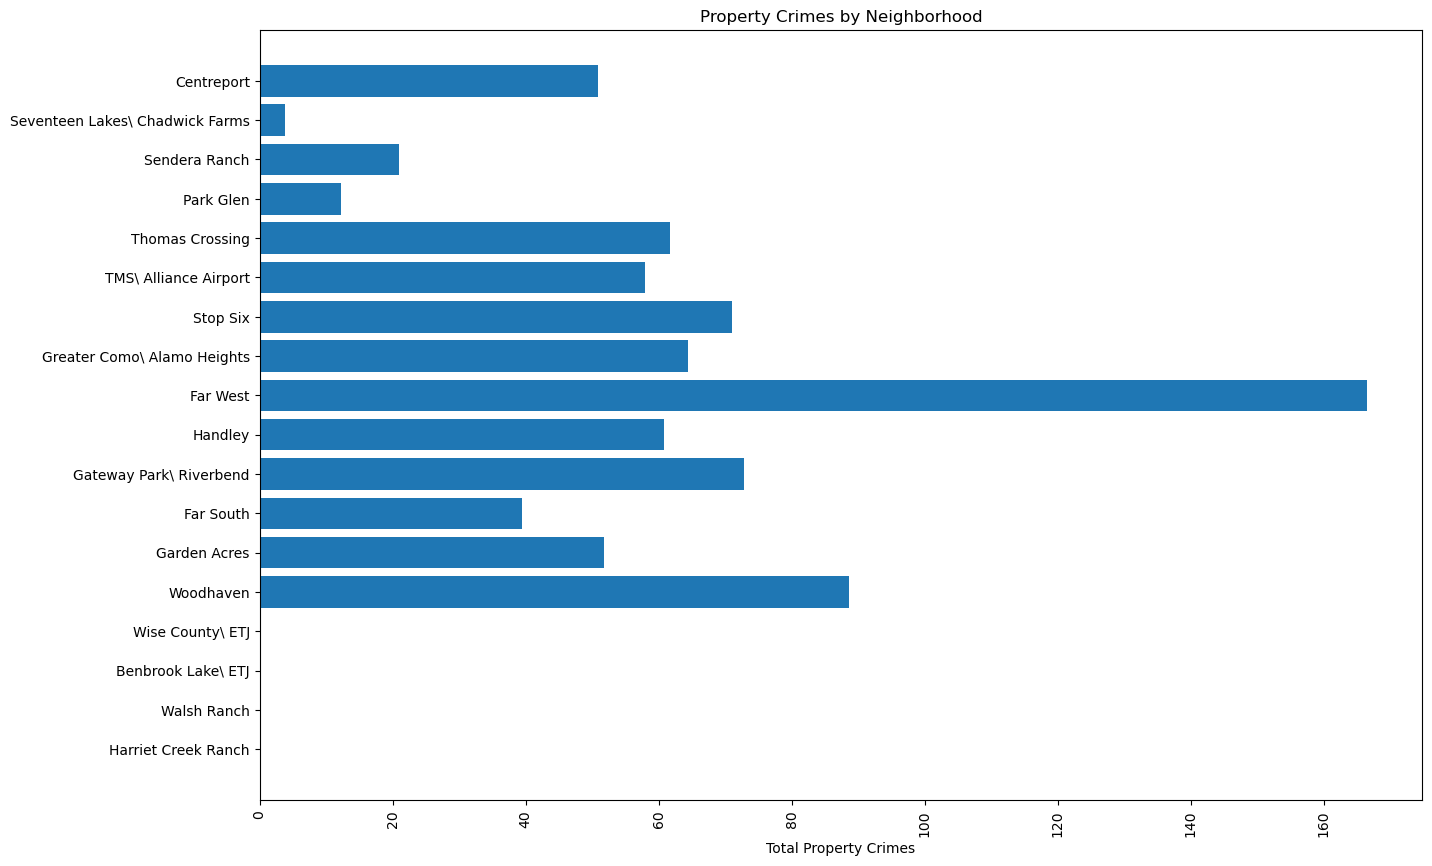

In [18]:
plt.figure(figsize=(15,10))
plt.xlabel('Total Property Crimes')
plt.title('Property Crimes by Neighborhood')
plt.barh(fort_worth_df['Neighborhood'],fort_worth_df['Property Crimes'])
plt.xticks(rotation=90)
plt.show()

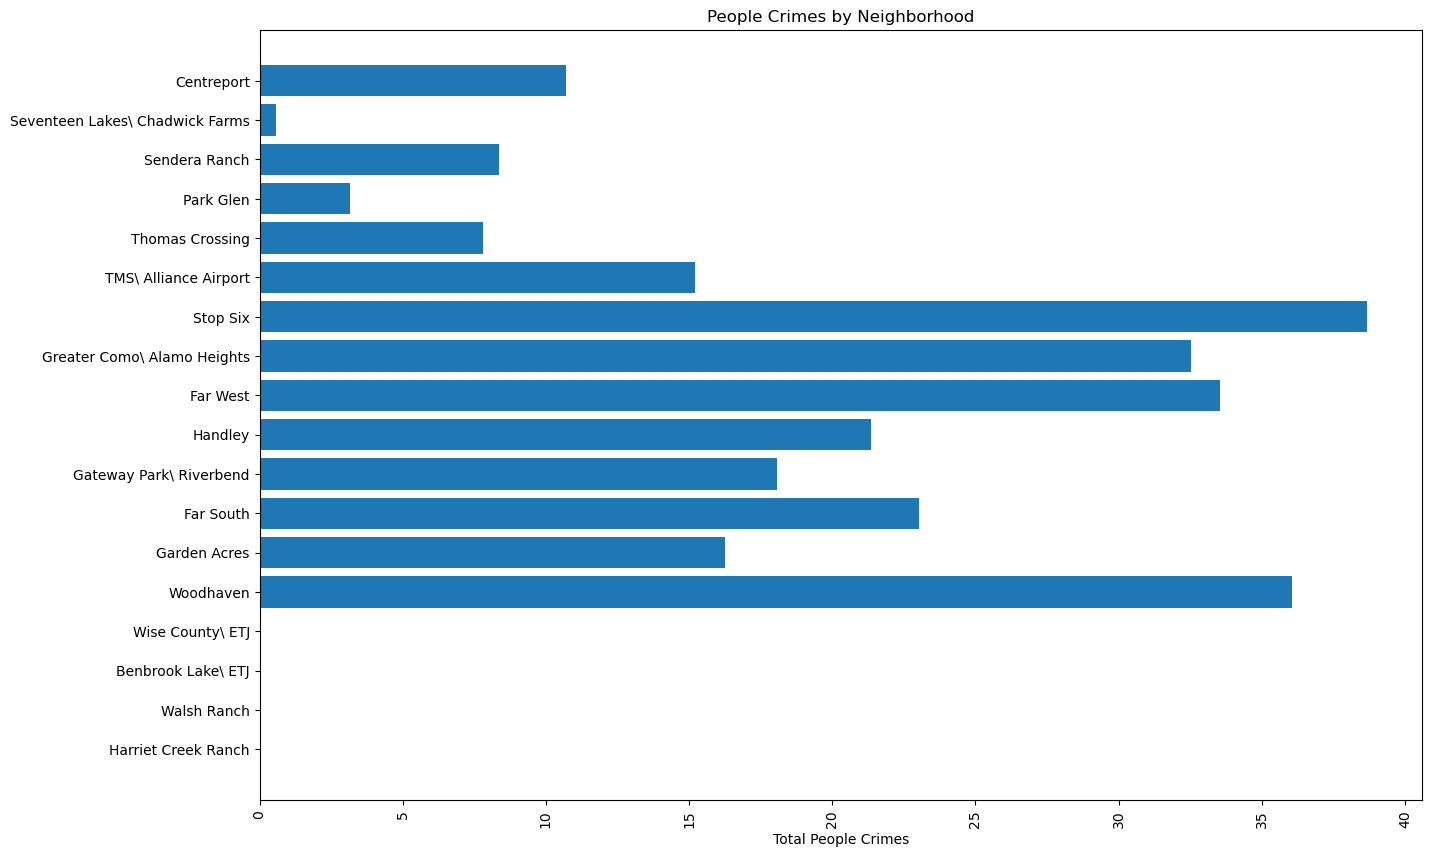

In [19]:
plt.figure(figsize=(15,10))
plt.xlabel('Total People Crimes')
plt.title('People Crimes by Neighborhood')
plt.barh(fort_worth_df['Neighborhood'],fort_worth_df['People Crimes'])
plt.xticks(rotation=90)
plt.show()

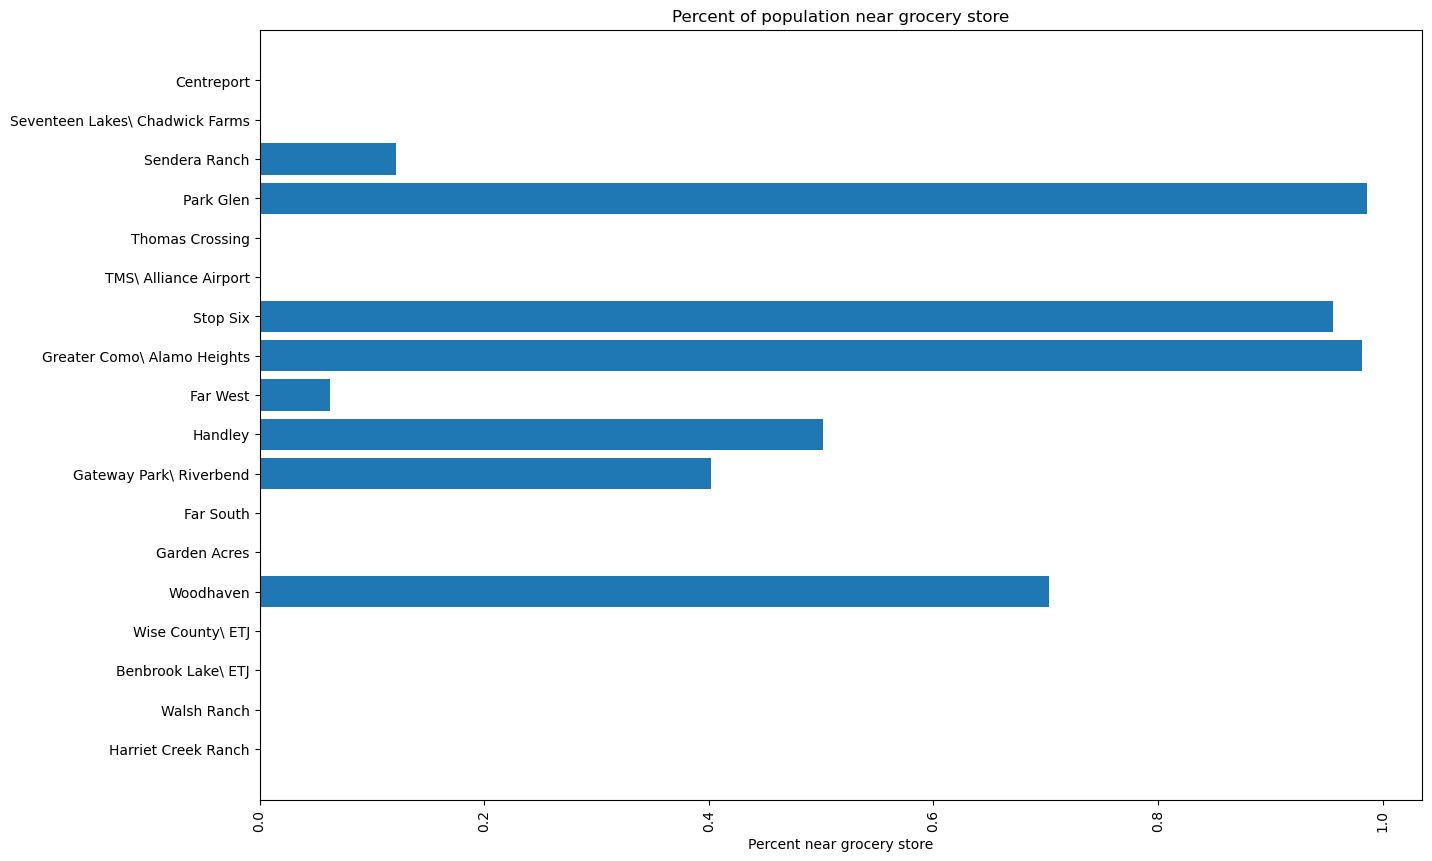

In [20]:
plt.figure(figsize=(15,10))
plt.xlabel('Percent near grocery store')
plt.title('Percent of population near grocery store')
plt.barh(fort_worth_df['Neighborhood'],fort_worth_df['Pct Near Grocery Store'])
plt.xticks(rotation=90)
plt.show()

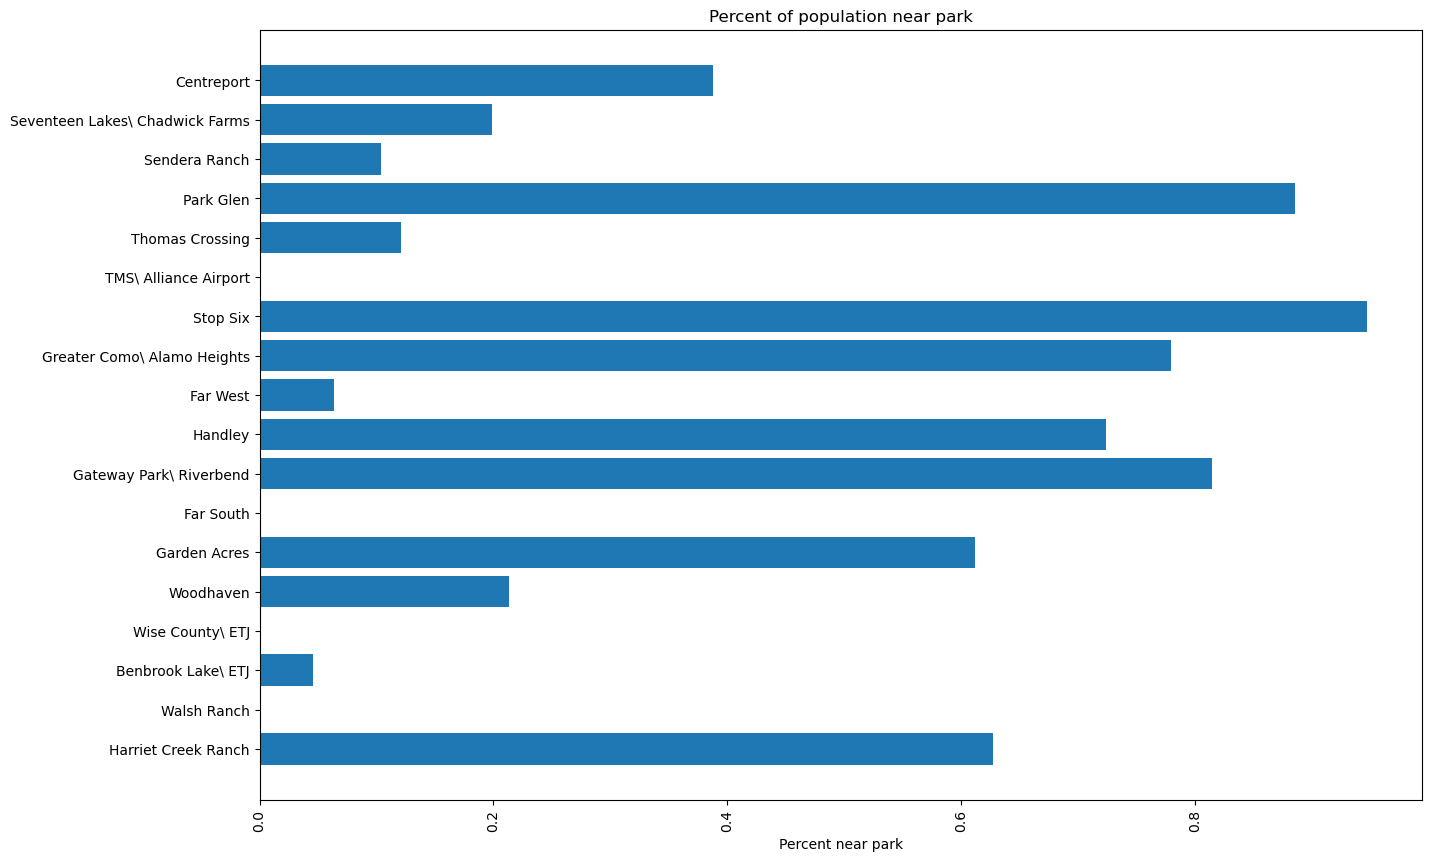

In [21]:
plt.figure(figsize=(15,10))
plt.xlabel('Percent near park')
plt.title('Percent of population near park')
plt.barh(fort_worth_df['Neighborhood'],fort_worth_df['Pct Near Park'])
plt.xticks(rotation=90)
plt.show()

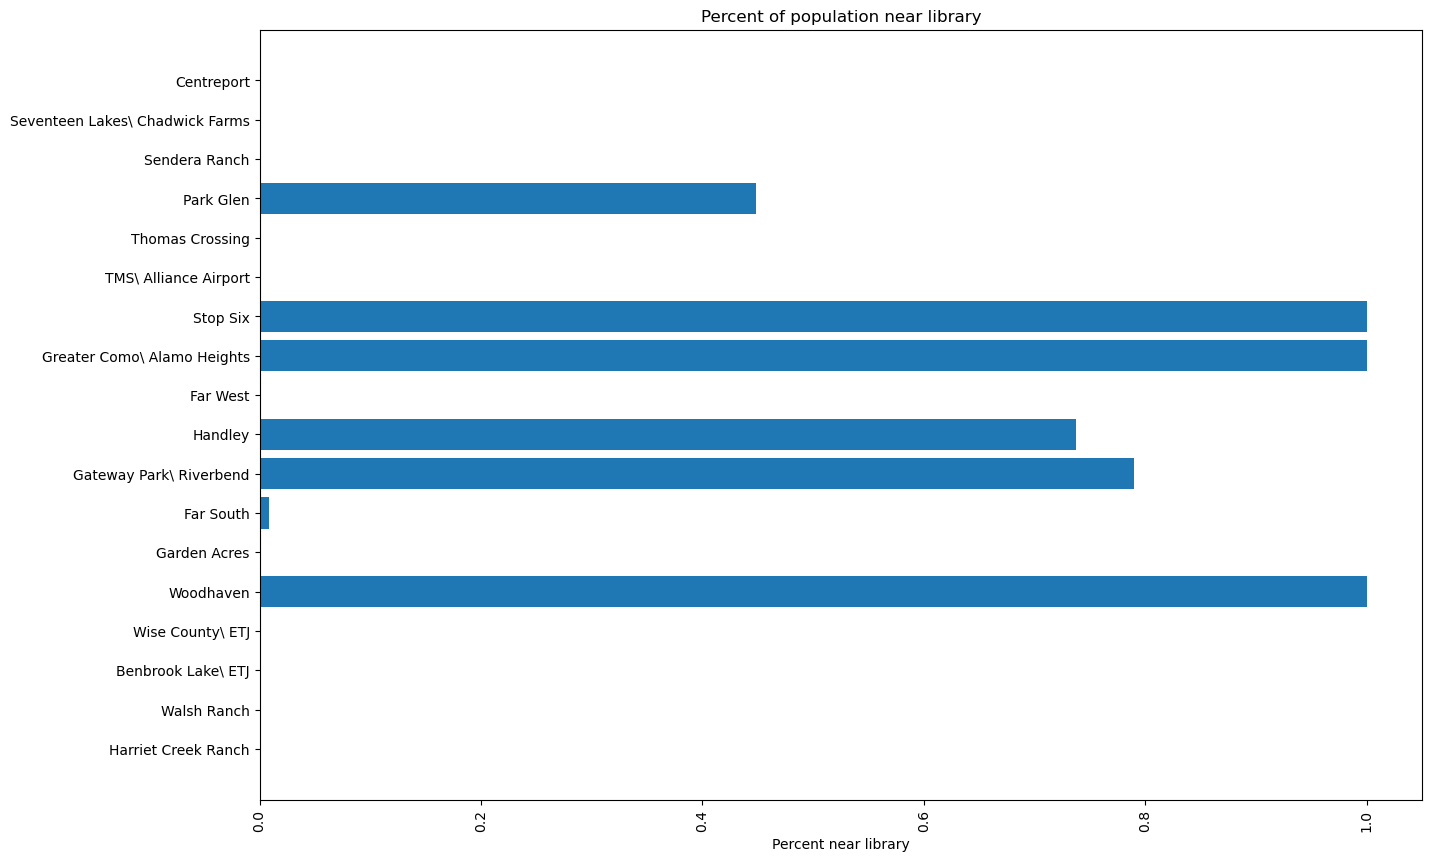

In [22]:
plt.figure(figsize=(15,10))
plt.xlabel('Percent near library')
plt.title('Percent of population near library')
plt.barh(fort_worth_df['Neighborhood'],fort_worth_df['Pct Near Library'])
plt.xticks(rotation=90)
plt.show()

Now that features in the dataset have been compared I will be using the Foursquare API to explore other types of amenities and cluster neighborhoods

In [23]:
# define the dataframe columns
column_names = ['Neighborhood', 'Zipcode', 'Latitude', 'Longitude'] 

# instantiate the dataframe
fw_df = pd.DataFrame(columns=column_names)

In [24]:
fw_df

,Neighborhood,Zipcode,Latitude,Longitude


In [25]:
fw_df['Neighborhood'] = fort_worth_df['Neighborhood']
fw_df['Zipcode'] = fort_worth_df['zipcode']
fw_df['Latitude'] = fort_worth_df['Latitude']
fw_df['Longitude'] = fort_worth_df['Longitude']

In [27]:
fw_df

,Neighborhood,Zipcode,Latitude,Longitude
0,Harriet Creek Ranch,76247,33.034649,-97.318635
1,Walsh Ranch,76008,32.721962,-97.566524
2,Benbrook Lake\ ETJ,76126,32.671490,-97.471095
3,Wise County\ ETJ,76052,33.008458,-97.402450
4,Woodhaven,76112,32.739380,-97.232300
5,Garden Acres,76140,32.627450,-97.291430
6,Far South,76140,32.627450,-97.291430
7,Gateway Park\ Riverbend,76118,32.808655,-97.235410
8,Handley,76112,32.739380,-97.232300
9,Far West,76135,32.815495,-97.438465


In [28]:
print('The dataframe has {} neighborhoods and {} zipcodes.'.format(
        len(fw_df['Neighborhood'].unique()),
        fw_df.shape[0]
    )
)

The dataframe has 18 neighborhoods and 18 zipcodes.


In [29]:
city = 'Fort Worth, TX'

geolocator = Nominatim(user_agent="fw_explorer")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fort Worth are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Fort Worth are 32.753177, -97.3327459.


In [30]:
# create map of Fort Worth using latitude and longitude values
map_fortworth = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode, neighborhood in zip(fw_df['Latitude'], fw_df['Longitude'], fw_df['Zipcode'], fw_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fortworth)  
    
map_fortworth

In [31]:
CLIENT_ID = '1O5XT33UQNEHYVEP5RZLXJADXMROBT4SG2JWMGX5UE3AIWCE' # your Foursquare ID
CLIENT_SECRET = 'G35G0CJ5NPRCEV1WY15O2K4XVFHUB32IIS3IZRAQETXNMPEV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 1O5XT33UQNEHYVEP5RZLXJADXMROBT4SG2JWMGX5UE3AIWCE
CLIENT_SECRET:G35G0CJ5NPRCEV1WY15O2K4XVFHUB32IIS3IZRAQETXNMPEV


In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
fw_venues = getNearbyVenues(names=fw_df['Neighborhood'],
                                 latitudes=fw_df['Latitude'],
                                 longitudes=fw_df['Longitude'])

Harriet Creek Ranch
Walsh Ranch
Benbrook Lake\ ETJ
Wise County\ ETJ
Woodhaven
Garden Acres
Far South
Gateway Park\ Riverbend
Handley
Far West
Greater Como\ Alamo Heights
Stop Six
TMS\ Alliance Airport
Thomas Crossing
Park Glen
Sendera Ranch
Seventeen Lakes\ Chadwick Farms
Centreport


In [34]:
print(fw_venues.shape)
fw_venues.head()

(184, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harriet Creek Ranch,33.034649,-97.318635,Northwest ISD Stadium,33.031607,-97.319821,Stadium
1,Harriet Creek Ranch,33.034649,-97.318635,AC And Heating Services,33.037520,-97.317655,Home Service
2,Harriet Creek Ranch,33.034649,-97.318635,Glock Party,33.037849,-97.318875,Clothing Store
3,Harriet Creek Ranch,33.034649,-97.318635,J Riley Roofing,33.038384,-97.318336,Construction & Landscaping
4,Walsh Ranch,32.721962,-97.566524,I- 30 East,32.721125,-97.569798,Moving Target


In [35]:
fw_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Benbrook Lake\ ETJ,14,14,14,14,14,14
Centreport,16,16,16,16,16,16
Far South,4,4,4,4,4,4
Far West,16,16,16,16,16,16
Garden Acres,4,4,4,4,4,4
Gateway Park\ Riverbend,6,6,6,6,6,6
Greater Como\ Alamo Heights,28,28,28,28,28,28
Handley,5,5,5,5,5,5
Harriet Creek Ranch,4,4,4,4,4,4


In [36]:
print('There are {} uniques categories.'.format(len(fw_venues['Venue Category'].unique())))

There are 97 uniques categories.


In [37]:
# one hot encoding
fw_onehot = pd.get_dummies(fw_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
fw_onehot['Neighborhood'] = fw_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [fw_onehot.columns[-1]] + list(fw_onehot.columns[:-1])
fw_onehot = fw_onehot[fixed_columns]

fw_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Art Gallery,BBQ Joint,Bakery,Bank,Beer Bar,Breakfast Spot,Burger Joint,Burrito Place,Business Service,Cafeteria,Cajun / Creole Restaurant,Camera Store,Chinese Restaurant,Clothing Store,Coffee Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food Court,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Home Service,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Insurance Office,Italian Restaurant,Jewelry Store,Kids Store,Latin American Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Movie Theater,Moving Target,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Post Office,Ramen Restaurant,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Plaza,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Stadium,Supplement Shop,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Theater,Thrift / Vintage Store,Vape Store,Video Store,Wings Joint,Women's Store
0,Harriet Creek Ranch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Harriet Creek Ranch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Harriet Creek Ranch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Harriet Creek Ranch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Walsh Ranch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
fw_onehot.shape

(184, 98)

In [39]:
fw_grouped = fw_onehot.groupby('Neighborhood').mean().reset_index()
fw_grouped

,Neighborhood,ATM,Accessories Store,American Restaurant,Antique Shop,Art Gallery,BBQ Joint,Bakery,Bank,Beer Bar,Breakfast Spot,Burger Joint,Burrito Place,Business Service,Cafeteria,Cajun / Creole Restaurant,Camera Store,Chinese Restaurant,Clothing Store,Coffee Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Food Court,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Home Service,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Insurance Office,Italian Restaurant,Jewelry Store,Kids Store,Latin American Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Mobile Phone Shop,Movie Theater,Moving Target,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Post Office,Ramen Restaurant,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Plaza,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Stadium,Supplement Shop,Sushi Restaurant,Taco Place,Tex-Mex Restaurant,Theater,Thrift / Vintage Store,Vape Store,Video Store,Wings Joint,Women's Store
0,Benbrook Lake\ ETJ,0.0000,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.142857,0.0000,0.00,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.142857,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.142857,0.0000,0.0000,0.000000,0.000000,0.071429,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.0000,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000
1,Centreport,0.0000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.00,0.0625,0.000000,0.000000,0.0,0.000000,0.125000,0.00,0.00,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.0000,0.000000,0.000000,0.062500,0.000000,0.0000,0.187500,0.000000,0.000000,0.000000,0.00,0.0625,0.0625,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.062500,0.000000,0.000000
2,Far South,0.0000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.25,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.000000
3,Far West,0.0625,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.00000

In [40]:
fw_grouped.shape

(16, 98)

In [41]:
num_top_venues = 5

for hood in fw_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = fw_grouped[fw_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Benbrook Lake\ ETJ----
                  venue  freq
0  Fast Food Restaurant  0.14
1    Italian Restaurant  0.14
2          Burger Joint  0.14
3     Convenience Store  0.14
4          Antique Shop  0.07


----Centreport----
               venue  freq
0                Gym  0.19
1        Coffee Shop  0.12
2          Hotel Bar  0.06
3        Gas Station  0.06
4  Convenience Store  0.06


----Far South----
               venue  freq
0     Discount Store  0.25
1          BBQ Joint  0.25
2  Mobile Phone Shop  0.25
3   Business Service  0.25
4                ATM  0.00


----Far West----
                 venue  freq
0            BBQ Joint  0.12
1        Grocery Store  0.12
2                  ATM  0.06
3  Sporting Goods Shop  0.06
4          Pizza Place  0.06


----Garden Acres----
               venue  freq
0     Discount Store  0.25
1          BBQ Joint  0.25
2  Mobile Phone Shop  0.25
3   Business Service  0.25
4                ATM  0.00


----Gateway Park\ Riverbend----
                

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = fw_grouped['Neighborhood']

for ind in np.arange(fw_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(fw_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Benbrook Lake\ ETJ,Italian Restaurant,Convenience Store,Burger Joint,Fast Food Restaurant,Dance Studio,Antique Shop,BBQ Joint,Discount Store,Gas Station,Mexican Restaurant
1,Centreport,Gym,Coffee Shop,Plaza,Burrito Place,Hotel Bar,Gas Station,Food Court,Convenience Store,Sandwich Place,Cafeteria
2,Far South,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market
3,Far West,Grocery Store,BBQ Joint,ATM,Smoke Shop,Gun Shop,Fried Chicken Joint,Liquor Store,Mexican Restaurant,Discount Store,Park
4,Garden Acres,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market
5,Gateway Park\ Riverbend,Post Office,Vape Store,Rental Car Location,Latin American Restaurant,Donut Shop,Farmers Market,Women's Store,Fast Food Restaurant,Dance Studio,Deli / Bodega
6,Greater Como\ Alamo Heights,Mexican Restaurant,Furniture / Home Store,Pizza Place,Sandwich Place,Coffee Shop,Seafood Restaurant,Music Venue,Convenience Store,Mediterranean Restaurant,Dessert Shop
7,Handley,Fried Chicken Joint,Discount Store,Chinese Restaurant,Gas Station,Fast Food Restaurant,Food Court,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
8,Harriet Creek Ranch,Home Service,Construction & Landscaping,Clothing Store,Stadium,Women's Store,Food Court,Deli / Bodega,Department Store,Dessert Shop,Discount Store
9,Park Glen,Pharmacy,Video Store,Pizza Place,Optical Shop,Cosmetics Shop,Grocery Store,Bakery,Gas Station,Coffee Shop,Massage Studio


In [45]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

fw_grouped_clustering = fw_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(fw_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 1, 0, 1, 1, 1, 3, 1], dtype=int32)

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

fw_merged = fw_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
fw_merged = fw_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ValueError: cannot insert Cluster Labels, already exists

In [48]:
fw_merged # check the last columns!

,Neighborhood,Zipcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Harriet Creek Ranch,76247,33.034649,-97.318635,3.0,Home Service,Construction & Landscaping,Clothing Store,Stadium,Women's Store,Food Court,Deli / Bodega,Department Store,Dessert Shop,Discount Store
1,Walsh Ranch,76008,32.721962,-97.566524,4.0,Moving Target,Women's Store,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market
2,Benbrook Lake\ ETJ,76126,32.671490,-97.471095,1.0,Italian Restaurant,Convenience Store,Burger Joint,Fast Food Restaurant,Dance Studio,Antique Shop,BBQ Joint,Discount Store,Gas Station,Mexican Restaurant
3,Wise County\ ETJ,76052,33.008458,-97.402450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Woodhaven,76112,32.739380,-97.232300,1.0,Fried Chicken Joint,Discount Store,Chinese Restaurant,Gas Station,Fast Food Restaurant,Food Court,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
5,Garden Acres,76140,32.627450,-97.291430,0.0,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market
6,Far South,76140,32.627450,-97.291430,0.0,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market
7,Gateway Park\ Riverbend,76118,32.808655,-97.235410,1.0,Post Office,Vape Store,Rental Car Location,Latin American Restaurant,Donut Shop,Farmers Market,Women's Store,Fast Food Restaurant,Dance Studio,Deli / Bodega
8,Handley,76112,32.739380,-97.232300,1.0,Fried Chicken Joint,Discount Store,Chinese Restaurant,Gas Station,Fast Food Restaurant,Food Court,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
9,Far West,76135,32.815495,-97.438465,1.0,Grocery Store,BBQ Joint,ATM,Smoke Shop,Gun Shop,Fried Chicken Joint,Liquor Store,Mexican Restaurant,Discount Store,Park


In [59]:
fw_merged = fw_merged.dropna()

In [60]:
fw_merged['Cluster Labels'].dtypes

dtype('float64')

In [61]:
fw_merged['Cluster Labels'] = fw_merged['Cluster Labels'].astype(int)

fw_merged

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Neighborhood,Zipcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Harriet Creek Ranch,76247,33.034649,-97.318635,3,Home Service,Construction & Landscaping,Clothing Store,Stadium,Women's Store,Food Court,Deli / Bodega,Department Store,Dessert Shop,Discount Store
1,Walsh Ranch,76008,32.721962,-97.566524,4,Moving Target,Women's Store,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market
2,Benbrook Lake\ ETJ,76126,32.671490,-97.471095,1,Italian Restaurant,Convenience Store,Burger Joint,Fast Food Restaurant,Dance Studio,Antique Shop,BBQ Joint,Discount Store,Gas Station,Mexican Restaurant
4,Woodhaven,76112,32.739380,-97.232300,1,Fried Chicken Joint,Discount Store,Chinese Restaurant,Gas Station,Fast Food Restaurant,Food Court,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
5,Garden Acres,76140,32.627450,-97.291430,0,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market
6,Far South,76140,32.627450,-97.291430,0,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market
7,Gateway Park\ Riverbend,76118,32.808655,-97.235410,1,Post Office,Vape Store,Rental Car Location,Latin American Restaurant,Donut Shop,Farmers Market,Women's Store,Fast Food Restaurant,Dance Studio,Deli / Bodega
8,Handley,76112,32.739380,-97.232300,1,Fried Chicken Joint,Discount Store,Chinese Restaurant,Gas Station,Fast Food Restaurant,Food Court,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
9,Far West,76135,32.815495,-97.438465,1,Grocery Store,BBQ Joint,ATM,Smoke Shop,Gun Shop,Fried Chicken Joint,Liquor Store,Mexican Restaurant,Discount Store,Park
10,Greater Como\ Alamo Heights,76107,32.754185,-97.361235,1,Mexican Restaurant,Furniture / Home Store,Pizza Place,Sandwich Place,Coffee Shop,Seafood Restaurant,Music Venue,Convenience Store,Mediterranean Restaurant,Dessert Shop


In [62]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(fw_merged['Latitude'], fw_merged['Longitude'], fw_merged['Neighborhood'], fw_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [64]:
fw_merged.loc[fw_merged['Cluster Labels'] == 0, fw_merged.columns[[1] + list(range(5, fw_merged.shape[1]))]]

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,76140,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market
6,76140,Business Service,Discount Store,BBQ Joint,Mobile Phone Shop,Women's Store,Department Store,Dessert Shop,Donut Shop,Electronics Store,Farmers Market


In [65]:
fw_merged.loc[fw_merged['Cluster Labels'] == 1, fw_merged.columns[[1] + list(range(5, fw_merged.shape[1]))]]

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,76126,Italian Restaurant,Convenience Store,Burger Joint,Fast Food Restaurant,Dance Studio,Antique Shop,BBQ Joint,Discount Store,Gas Station,Mexican Restaurant
4,76112,Fried Chicken Joint,Discount Store,Chinese Restaurant,Gas Station,Fast Food Restaurant,Food Court,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
7,76118,Post Office,Vape Store,Rental Car Location,Latin American Restaurant,Donut Shop,Farmers Market,Women's Store,Fast Food Restaurant,Dance Studio,Deli / Bodega
8,76112,Fried Chicken Joint,Discount Store,Chinese Restaurant,Gas Station,Fast Food Restaurant,Food Court,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
9,76135,Grocery Store,BBQ Joint,ATM,Smoke Shop,Gun Shop,Fried Chicken Joint,Liquor Store,Mexican Restaurant,Discount Store,Park
10,76107,Mexican Restaurant,Furniture / Home Store,Pizza Place,Sandwich Place,Coffee Shop,Seafood Restaurant,Music Venue,Convenience Store,Mediterranean Restaurant,Dessert Shop
11,76105,Community Center,Theater,Restaurant,Sandwich Place,Women's Store,Fast Food Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop
12,76177,Furniture / Home Store,Clothing Store,Mexican Restaurant,Shoe Store,American Restaurant,Tex-Mex Restaurant,Cajun / Creole Restaurant,Men's Store,Kids Store,Women's Store
14,76137,Pharmacy,Video Store,Pizza Place,Optical Shop,Cosmetics Shop,Grocery Store,Bakery,Gas Station,Coffee Shop,Massage Studio
17,76155,Gym,Coffee Shop,Plaza,Burrito Place,Hotel Bar,Gas Station,Food Court,Convenience Store,Sandwich Place,Cafeteria


In [66]:
fw_merged.loc[fw_merged['Cluster Labels'] == 2, fw_merged.columns[[1] + list(range(5, fw_merged.shape[1]))]]

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,76262,IT Services,Construction & Landscaping,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market


In [67]:
fw_merged.loc[fw_merged['Cluster Labels'] == 3, fw_merged.columns[[1] + list(range(5, fw_merged.shape[1]))]]

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,76247,Home Service,Construction & Landscaping,Clothing Store,Stadium,Women's Store,Food Court,Deli / Bodega,Department Store,Dessert Shop,Discount Store
15,76247,Home Service,Construction & Landscaping,Clothing Store,Stadium,Women's Store,Food Court,Deli / Bodega,Department Store,Dessert Shop,Discount Store


In [68]:
fw_merged.loc[fw_merged['Cluster Labels'] == 4, fw_merged.columns[[1] + list(range(5, fw_merged.shape[1]))]]

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,76008,Moving Target,Women's Store,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market
